In [24]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

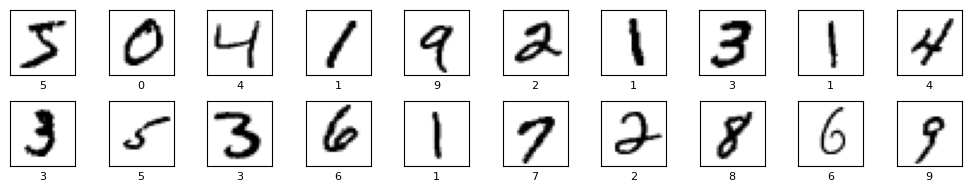

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

plt.figure(figsize=(10, 2))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i], fontsize=8)
plt.tight_layout()
plt.show()

In [26]:

model_creation = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_creation.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_creation.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model_creation.fit(x_train,
                    y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=64)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9466 - loss: 0.1741 - val_accuracy: 0.9793 - val_loss: 0.0700
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9837 - loss: 0.0505 - val_accuracy: 0.9877 - val_loss: 0.0425
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9889 - loss: 0.0348 - val_accuracy: 0.9887 - val_loss: 0.0400
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9921 - loss: 0.0251 - val_accuracy: 0.9890 - val_loss: 0.0399
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9888 - val_loss: 0.0417


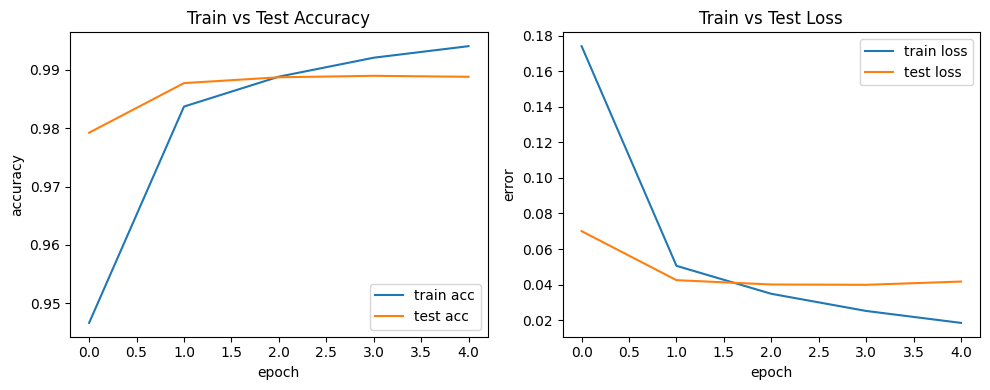

In [28]:


# Create a single figure with two subplots
plt.figure(figsize=(10, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Train vs Test Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('epoch')
plt.ylabel('error')
plt.legend()
plt.title('Train vs Test Loss')

plt.tight_layout()
plt.show()

In [29]:
test_loss, test_acc = model_creation.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9894 - loss: 0.0290
Test accuracy: 0.9894
Test loss: 0.0290


In [30]:
model_creation.save('model.keras')